In [1]:
import cv2
import numpy as np
import pandas as pd
import os

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf

# Folder path image loading

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['Glioma_Tumor','Meningioma_tumor','No_tumor','Pituitary_tumor']
for i in labels:
    folderPath = os.path.join('archive/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

        
for i in labels:
    folderPath = os.path.join('archive/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Shuffling the images to remove biasnes

In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

# Train test Split

In [6]:
X_train,X_test,Y_train,Y_test =  train_test_split(X_train,
                                                  Y_train,
                                                  test_size=0.1,
                                                  random_state=101)

In [7]:
Y_train_new = []
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train = Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

Y_test_new = []
for i in Y_test:
    Y_test_new.append(labels.index(i))
Y_test = Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test) 

# CNN Model

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2)) 
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
# model.add(Conv2D(256,(3,3),activation = 'relu'))
# model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation= 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [27]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer ='Adam',
    metrics=['accuracy'])

In [28]:
history = model.fit(X_train,
                    Y_train,
                    epochs=18,
                    validation_split=0.1,
                   batch_size=16)

Epoch 1/18
166/166 [==============================] - 161s 960ms/step - loss: 1.4113 - accuracy: 0.3072 - val_loss: 1.3048 - val_accuracy: 0.4490
Epoch 2/18
166/166 [==============================] - 187s 1s/step - loss: 1.1925 - accuracy: 0.4692 - val_loss: 1.1575 - val_accuracy: 0.5170
Epoch 3/18
166/166 [==============================] - 201s 1s/step - loss: 1.0716 - accuracy: 0.5365 - val_loss: 1.0469 - val_accuracy: 0.5374
Epoch 4/18
166/166 [==============================] - 199s 1s/step - loss: 0.9810 - accuracy: 0.5830 - val_loss: 0.9178 - val_accuracy: 0.6020
Epoch 5/18
166/166 [==============================] - 170s 1s/step - loss: 0.8894 - accuracy: 0.6065 - val_loss: 1.0213 - val_accuracy: 0.5408
Epoch 6/18
166/166 [==============================] - 174s 1s/step - loss: 0.8254 - accuracy: 0.6322 - val_loss: 0.8468 - val_accuracy: 0.6361
Epoch 7/18
166/166 [==============================] - 190s 1s/step - loss: 0.7443 - accuracy: 0.6727 - val_loss: 0.7598 - val_accuracy: 0.6

In [29]:
model.save('CNN.h5')

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

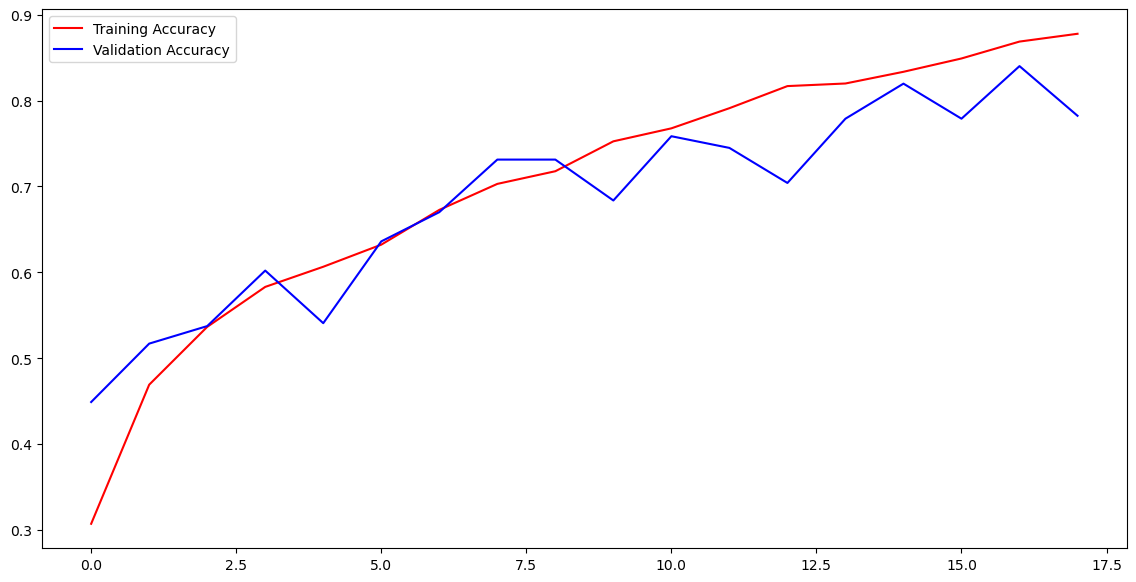

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation Accuracy')
plt.legend(loc ='upper left')
plt.savefig('acc_val_acc.png')
plt.show()

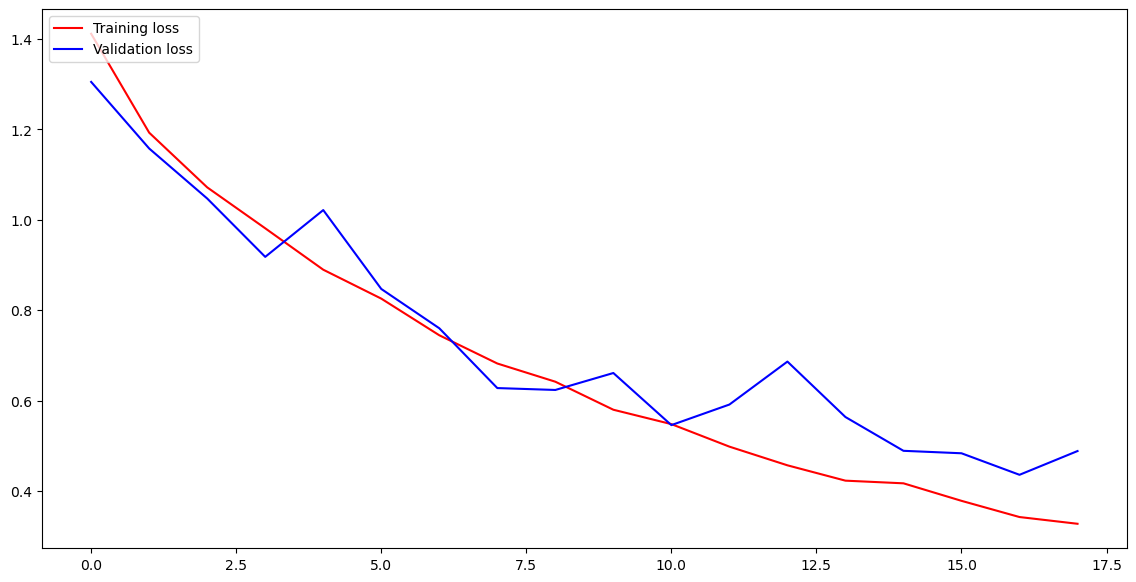

In [57]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.legend(loc ='upper left')
plt.savefig('loss_val_loss.png')
plt.show()

In [52]:
img = cv2.imread('archive/Testing/glioma_tumor/image(30).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

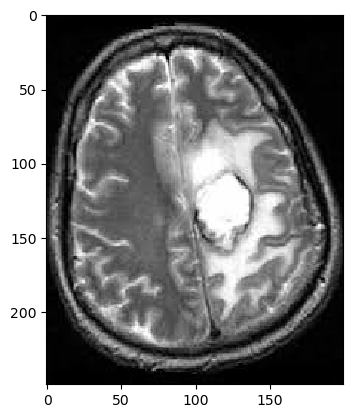

In [53]:
from tensorflow.keras.preprocessing import image
img = image.load_img('archive/Testing/glioma_tumor/image(30).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [54]:
a=model.predict(img_array)
indices = a.argmax()
indices
if indices ==0:
    print('Glioma Tumor')
elif indices == 1:
    print('Meningioma Tumor')
elif(indices == 2):
    print('No Tumor')
else:
    print('Pituitary Tumor')

1/1 [==============================] - 0s 30ms/step
Glioma Tumor
